<a href="https://colab.research.google.com/github/ANG29/COMP5318/blob/main/comp5381_a1_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import scipy.io
import numpy as np 

In [3]:
file_by_merge = "/content/drive/MyDrive/COMP5318/emnist-bymerge.mat"

In [4]:
mat_data_by_merge = scipy.io.loadmat(file_by_merge, mdict=None, appendmat=True)
data_train_by_merge = mat_data_by_merge["dataset"][0][0][0][0][0][0]

In [5]:
data_train_by_merge

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
label_train_by_merge = mat_data_by_merge["dataset"][0][0][0][0][0][1]
label_train_by_merge

array([[24],
       [36],
       [ 5],
       ...,
       [ 9],
       [36],
       [ 1]], dtype=uint8)

In [59]:
data_test_by_merge = mat_data_by_merge["dataset"][0][0][1][0][0][0]
label_test_by_merge = mat_data_by_merge["dataset"][0][0][1][0][0][1]
mapping = mat_data_by_merge["dataset"][0][0][2]

In [60]:
label_test_by_merge

array([[24],
       [22],
       [28],
       ...,
       [ 3],
       [ 3],
       [ 7]], dtype=uint8)

## ***开始卷***

In [54]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as Data

In [ ]:
test = data_train_by_merge[0].reshape(28,28)


test

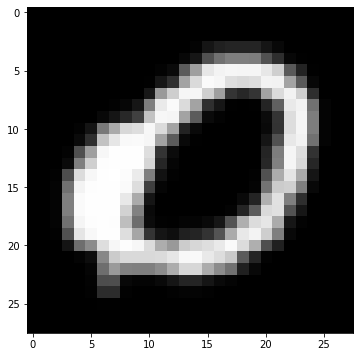

In [20]:
import matplotlib.pyplot as plt
from PIL import Image
plt.figure(figsize = (6,6))
plt.imshow(test, cmap = plt.cm.gray)

In [45]:
import numpy as np
pic_list = []
for pic in data_train_by_merge:
  new_pic = pic.reshape(28,28)
  pic_list.append(new_pic)

data_train_by_merge_28 = np.array(pic_list)

In [50]:
data_train_by_merge_28.dtype

dtype('uint8')

In [61]:
train_data = torch.from_numpy(data_train_by_merge_28.astype(np.float32))
train_label = torch.from_numpy(label_train_by_merge.astype(np.int64))
train_data.shape

torch.Size([697932, 28, 28])

In [62]:
train_label.shape

torch.Size([697932, 1])

In [63]:
train_data_all = Data.TensorDataset(train_data,train_label)

In [64]:
train_loader = Data.DataLoader(
    dataset=train_data_all,
    batch_size=4,
    shuffle = True,
    num_workers = 1,
)